In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 6장 일반선형모델

## 여러가지 확률분포

### 분석준비

In [ ]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 이항분포

In [ ]:
# 질량함수(Probability Mass Function; PMF)
# 시행횟수 n = 2
# 성공확률(앞면이 한번) k = 1
# 앞면이 나올 확률 p = 0.5
sp.stats.binom.pmf(k = 1, n = 2, p = 0.5)

0.5000000000000002

In [ ]:
# 이항분포를 따르는 난수 생성 (sp.stats.binom.rvs)
# 시행횟수 n = 10
# 앞면이 나올 확률 p = 0.2
# 반복횟수 size = 5
np.random.seed(1)
sp.stats.binom.rvs(n = 10, p = 0.2, size = 5)

array([2, 3, 0, 1, 1])

<ipython-input-5-0ee1e3031bde>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rvs_binomial, bins = m, kde = False,


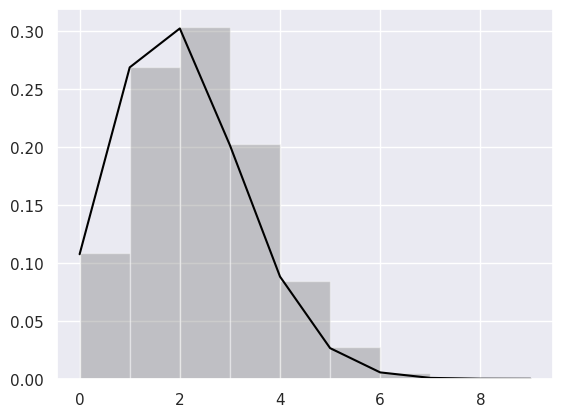

In [ ]:
# N=10,p=0.2 인 이항분포
binomial = sp.stats.binom(n = 10, p = 0.2)

# 난수
np.random.seed(1)
rvs_binomial = binomial.rvs(size = 10000)

# 확률밀도 함수
m = np.arange(0,10,1)
pmf_binomial = binomial.pmf(k = m)

# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.distplot(rvs_binomial, bins = m, kde = False,
             norm_hist = True, color = 'gray')
plt.plot(m, pmf_binomial, color = 'black')

### 푸아송 분포
- 푸아송 분포는 1개 또는 2개, 1회 또는 2회 등의 '카운트 데이터'가 따르는 이산형 확률분포 이다.
- 카운트 데이터는 0 이상의 정수이다.
  - -무한대 ~ + 무한대 의 실수를 취하는 정규분포와 차이
- 푸아송 분포의 모수는 강도(일이 일어날 횟수에 대한 기댓값, 발생 강도) 'λ(람다)' 밖에 없다. 푸아송 분포를 따르는 확률변수는 기댓값과 분산 모두 'λ'와 같다.

- 낚싯대를 바꾸면 잡아올리는 물고기 수가 달라지는지, 주변 환경에 따라 조사 구획 내의 생물의 개체수가 변하는지, 날씨에 따라 상품의 판매 개수가 얼마나 달라지는지 등을 알아 볼 때 푸아송 분포를 사용한다.

- 푸아송 분포는 이항분포에서 도출할 수 있다.
  - 성공확률이 한없이 0 에 가깝지만 시행횟수가 무한히 많은 이항분포 의 경우 그 평균값은 푸아송 분포의 평균값('람다') 와 같다.
  - 예를 들어 (1) 어느 하루의 교통사고 사상자수라는 카운트 데이터가 있다고 가정해 본다. 이때 사고에 휘말릴 가능성이 있는 사람 수는 길을 걷고 있는 모든 사람 수라는 것이 되므로 N 은 매우 큰 값이 된다. 한편 사고에 휘말릴 확률 p 는 매우 작을 것이다. 일어나기 어려운 사건(p -> 0) 이지만 대상이 되는 사람 수가 굉장히 많을 때(N -> 무한대)의 발생건수가 푸아송 분포를 따르는 것이다.
  - (2) 낚이는 대상이 되는 물고기는 바닷속에 많이 있다. 하지만 물고기가 낚일 확률은 아주 작다. 그런 상황에서 몇 마리의 물고기를 낚을 수 있는지 센다면 그 결과는 푸아송 분포를 따른다고 할 수 있다.

In [ ]:
# 강도가 5(강도는 λ이며, 푸아송 분포의 평균값)인 푸아송 분포에서
# 어떤 값 (k; 카운트) 2를 얻는 확률
sp.stats.poisson.pmf(k = 2, mu = 5)

0.08422433748856832

In [ ]:
# λ=2 (강도가 2인) 푸아송 분포를 따르는 난수 5개 생성
np.random.seed(1)
sp.stats.poisson.rvs(mu = 2, size = 5)

array([2, 1, 0, 1, 2])

<ipython-input-8-479cf1747c4d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rvs_poisson, bins = m, kde = False,


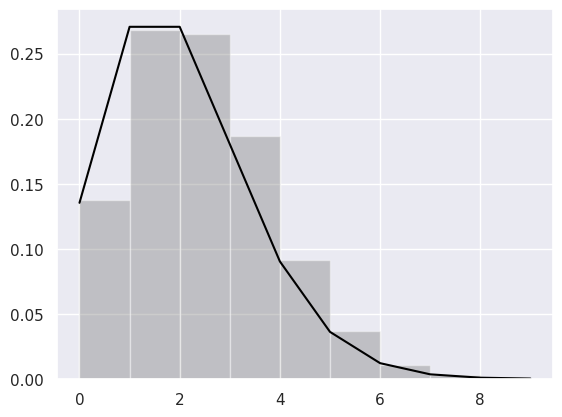

In [ ]:
# λ=2 인 푸아송 분포
poisson = sp.stats.poisson(mu = 2)

# 난수
np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)

# 확률질량함수
# m = np.arange(0,10,1)
pmf_poisson = poisson.pmf(k = m)

# 난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.distplot(rvs_poisson, bins = m, kde = False,
             norm_hist = True, color = 'gray')
plt.plot(m, pmf_poisson, color = 'black')

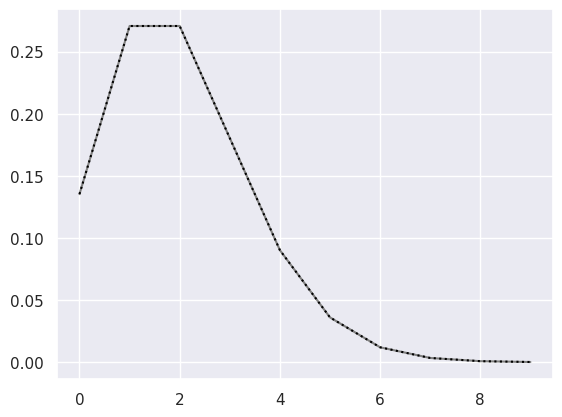

In [ ]:
# 푸아송 분포와 이항분포의 관계 확인

# N 이 크고 p 가 작은 이항분포
N = 100000000
p = 0.00000002
binomial_2 = sp.stats.binom(n = N, p = p)

# 확률질량함수
# m = np.arange(0,10,1)
pmf_binomial_2 = binomial_2.pmf(k = m)

# 두 확률질량의 그래프
plt.plot(m, pmf_poisson, color = 'gray')
plt.plot(m, pmf_binomial_2, color = 'black',
         linestyle = 'dotted')

### 링크함수
- 링크함수는 종속변수와 선형예측자를 서로 대응시키기 위해 사용한다.
  - 선형예측자: 선형예측자란 독립변수를 선형의 관계식으로 표현한 것이다.
    - 예를 들어 맥주 매상이라는 종속 변수를 기온이라는 독립변수에서 예측하는 경우 [절편 + 계수*기온] 이 된다.
- 맥주 판매 개수를 구한다고 가정해보자.
  - 맥주 판매 개수 = 절편 + 계수*기온
  - 맥주 판매 개수는 음수가 될 수 없다. 하지만, 위 식과 같이 맥주 판매 개수를 표현할 수 있을 때 맥주 판매 개수는 음수가 발생할 수 있다.
- 이를 방지하기 위해 링크함수를 사용한다. 개수 등 카운트 데이터를 대상으로 할 때는 링크함수로 로그함수가 자주 사용된다.
  - log[맥주 판매 개수] = 절편 + 계수*기온
  - 다시 위 식의 양변에 exp 를 취한다.
  - 맥주 판매 개수 = ecp[절편 + 계수*기온]
- 확률분포와 링크함수는 아래와 같이 한 벌로 사용되는 경우가 많다.

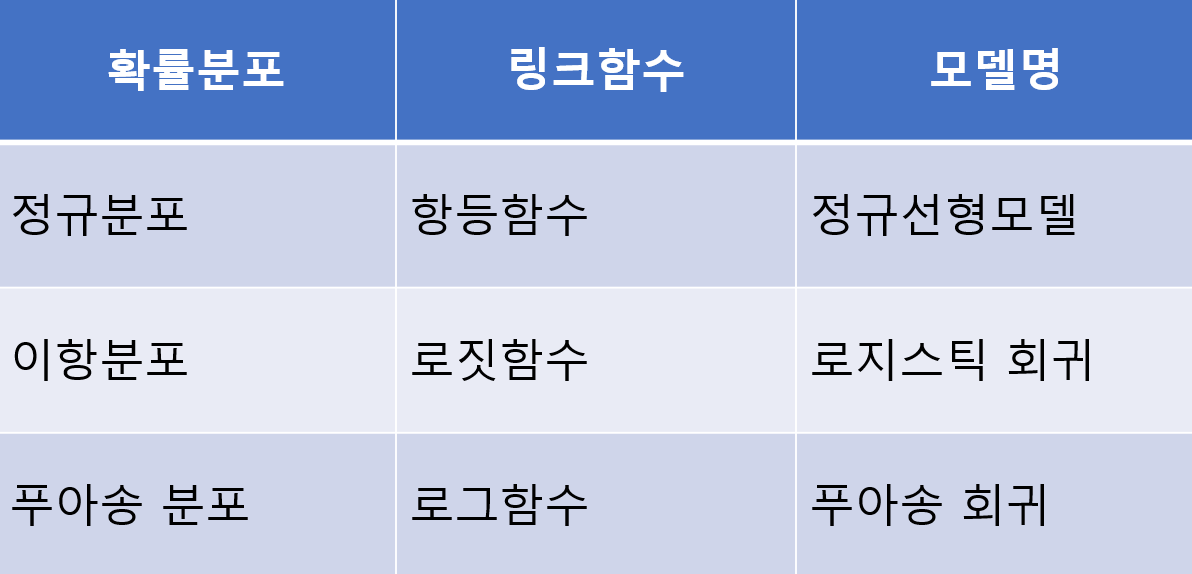

## 로지스틱 회귀
- 로지스틱 회귀는 확률분포에 이항분포를 사용하고, 링크함수에 로짓함수를 사용한 일반선형모델이다.
- 독립변수는 여러 개 있어도 상관없고, 연속형과 카테고리형이 섞여 있어도 상관없다.

### 두 값의 판별문제
- 종속변수를 합격하면 1, 불합격하면 0 을 취하는 이항확률변수라고 가정해보자.
- 이 때, 다음과 같이 합격, 불합격 여부를 예측하는 것은 잘못된 방법이다.
  - 시험의 합불(합격 1, 불합격 0) = 절편 + 계수*공부시간
- 시함 합격률을 종속변수로 두고 모델을 가정해보자
  - 시험의 합격률 = 절편 + 계수*공부시간
  - 0인지 1인지 선형예측자로 예측하는 것에 비하면 괜찮지만, 여전히 문제가 있다.
  - 합격률은 그 정의상 [0,1]의 범위를 가질 것이기 때문이다. 위 식에서는 시험의 합격률이 마이너스값이 되거나, 1을 넘는 값이 될 가능성이 있다.
  - 이 문제는 링크함수로 로짓함수를 적용하여 해결할 수 있다.
- 정리:
  - 종속 변수를 이항확률변수로 놓을 때, 곧바로 카테고리형의 라벨인코딩 값을 종속변수로 놓아서는 안된다. 이 때, 종속변수는 확률 [0,1] 의 범위로 두고 이를 다시 링크함수를 적용하여 예측하는 방향으로 모델을 구현해야 한다.
  - 로짓함수와 로지스틱함수의 특징은 본 실습 교재 ['파이썬으로 배우는 통계학 교과서  (2021년 2월 1일 발행자)'] 의 p.319 - 321 을 참고

### EDA

In [ ]:
# '시험 합격' 데이터 불러오기
# hour: 공부시간, result: 합격여부(합격:1, 불합격:0)
test_result = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/6-3-1-logistic-regression.csv")
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


<Axes: xlabel='hours', ylabel='result'>

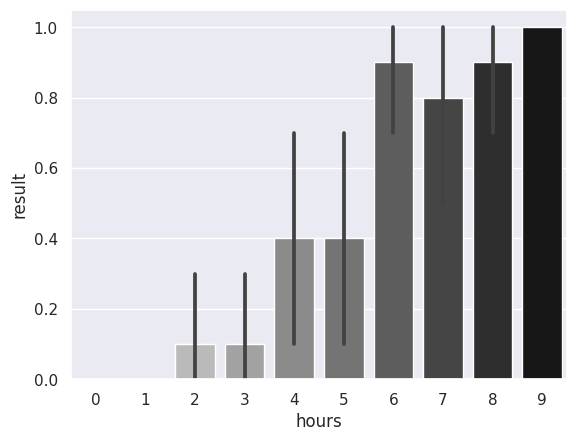

In [ ]:
sns.barplot(x = "hours",y = "result",
            data = test_result, palette='gray_r')

In [ ]:
# 공부시간별 합격률
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


### 로지스틱 회귀
- 일반선형모델을 추정하는 경우에는 smf.glm 함수를 사용한다.
  - 파라미터 formula: 종속변수와 독립변수를 나타내고 독립변수가 여러 개인 경우 '+' 로 연결한다.
  - 파라미터 data: 대상이 되는 데이터를 pandas 테이터프레임으로 지정한다.
  - 파라미터 family: 확률분포를 뜻한다. 이항분포 지정 시 sm.families.Binomial() 로 표현한다.(푸아송의 경우 sm.families.Poission())
    - 링크함수는 지정되어 있지 않다. 이항분포를 지정했을 경우 링크함수를 지정하지 않으면 기본적으로 링크함수로 로짓함수가 지정된다.
    - 기본 링크함수는 확률분포에 다라 자동으로 바뀐다. 푸아송 분포를 지정하면 자동으로 로그함수가 된다.
    - sm.families.Binomial(link = sm.families.links.logit())으로 표현할 수 있다.

In [ ]:
# 추정 결과 출력(링크함수는 미지정(자동으로 지정됨))
mod_glm = smf.glm(formula = "result ~ hours",
                  data = test_result,
                  family=sm.families.Binomial()).fit()

In [ ]:
# 추정 결과 출력(링크함수를 logit 함수로 지정)
logistic_reg = smf.glm(formula = "result ~ hours",
                       data = test_result,
                       family=sm.families.Binomial(link=sm.families.links.logit())).fit()

### 로지스틱 회귀 결과의 출력

In [ ]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 13 Jul 2023   Deviance:                       68.028
Time:                        19:06:43   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [ ]:
logistic_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 13 Jul 2023   Deviance:                       68.028
Time:                        19:06:43   Pearson chi2:                     84.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5032
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

- Method 의 IRLS(Iterative Reweighted Least Squares)은 반복적인 최소제곱법을 뜻한다.
- 내부에서 계산한 반복수가 No.Iterations에 나온다 (위 summary 에서는 내부에서 6번 반복)
- Deviance 와 Pearson chi2 라는 지표는 모델 적합도를 나타내는 지표이다.
- 계수에서는 t검정 대신 Wald 검정 결과가 출력되고 있다.

### 모델 선택
- AIC 를 사용하여 Null 모델과 공부시간이라는 독립변수가 있는 모델 중 어느 족이 좋은 모델인지 비교해본다.

In [ ]:
# Null 모델
mod_glm_null = smf.glm(
    "result ~ 1", data = test_result,
    family=sm.families.Binomial()).fit()

In [ ]:
# AIC 와 비교
print("Null 모델: ", mod_glm_null.aic.round(3))
print("변수가 있는 모델: ", mod_glm.aic.round(3))

Null 모델:  139.989
변수가 있는 모델:  72.028


- 공부시간을 독립변수로 이용한 모델의 AIC 가 더 작다.
- 공부시간이라는 변수는 합격률을 예측하는 데 도움이 된다는 뜻이다.
- 공부시간의 계수가 양수였던 점도 감안하면 공부시간을 늘리면 합격률이 오른다고 판단해도 좋다.

### 로지스틱 회귀곡선 그래프
- seaborn 의 lmpolot 함수에 파라미터를 'logistic = True' 로 지정하여 그릴 수 있다.

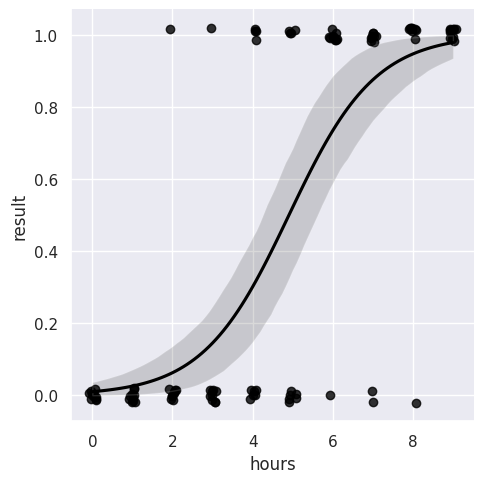

In [ ]:
# 로지스틱 회귀의 회귀곡선
# x_jitter 와 y_jitter는 산포도가 그리는 데이터의 점을 조금 위아래로 흩어지게 하는 설정
# 합격여부에는 0 과 1 만 있어서 데이터가 겹치므로 x_jitter 와 y_jitter 설정을 한다.
sns.lmplot(x = "hours", y = "result",
           data = test_result,
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

### 성공확률 예측
- 합격률을 수치로 얻어본다.

In [ ]:
# 0~9 까지 1씩 증가시키는 등차수열
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
# 성공확률의 예측치
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 로지스틱 회귀계수와 오즈비의 관계
- '오즈'는 실패하는 것(1-p)보다 성공(p)하는 것이 몇 배 더 쉬운가를 나타내는 것으로, 다음과 같이 나타낸다.
  - 오즈 = p / (1-p)
  - p = 0.5 일 때 오즈는 1이 되어 성공과 실패의 수림이 변하지 않는다.
  - p = 0.75 일때 오즈는 3이 되어 성공이 실패보다 3배 쉬워진다.
- '오즈'에 로그를 취한 것을 '로그오즈'라 한다. ***로짓함수는 성공확률을 로그오즈로 변환하는 함수로 볼 수 있다.***
- '오즈비'는 오즈 간 비율을 취한 것이다. 오즈비에 로그를 취한 것을 '로그오즈비'라고 부른다.

- 회귀계수는 독립변수를 1단위 변화시켰을 때의 로그오즈비라고 해석 할 수 있다.

In [ ]:
# 공부시간이 1시간일 때의 합격률
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 공부시간이 2시간일 때의 합격률
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [ ]:
# 오즈
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# 로그오즈비
sp.log(odds_2 / odds_1)

<ipython-input-23-2b32b983d8c6>:6: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  sp.log(odds_2 / odds_1)


array([0.929])

In [ ]:
# 공부시간의 계수
mod_glm.params["hours"]

0.9288901756284946

In [ ]:
# 계수에 exp를 취한 것이 오즈비 이다.
# 공부시간은 로그오즈비 이므로
sp.exp(mod_glm.params["hours"])

<ipython-input-25-3a363879d215>:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(mod_glm.params["hours"])


2.5316978778757737

## 일반선형모델의 평가
- 모집단분포가 정규분포 이외의 분포가 되면 잔차의 취급이 크게 바뀐다.
- 잔차는 데이터와 모델의 괴리를 표현하는 중요한 지표이다.

### 분석 준비

In [ ]:
# 데이터 불러오기
test_result = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/6-3-1-logistic-regression.csv")

# 모델링
mod_glm = smf.glm("result ~ hours", data = test_result,
                  family=sm.families.Binomial()).fit()

### 피어슨 잔차
- 이항분포에서 피어슨 잔차는 다음과 같이 계산한다.
  - Pearson residuals = 관측값(실제값) - 예측성공확률(p) / {예측성공확률(p)*예측실패확률(1-p)}^(1/2)
  - 즉, 관측값과 예측값의 차이를 이항분포의 표준편차로 나눈것과 같다.
  - 일반 잔차를 분포의 표준편차로 나눈 것
- 퍼이슨 잔차의 제곱합은 '피어슨 카이제곱통계량' 이라고도 부르며, 모델 적합도의 지표가 된다.

In [ ]:
# 피어슨 잔차 계산

# 예측한 성공확률
pred = mod_glm.predict()
# 종속변수(시험 합격여부)
y = test_result.result

# 피어슨 잔차
peason_resid = (y - pred) / sp.sqrt(pred * (1 - pred))
peason_resid.head(3)

<ipython-input-28-b5b076faed0f>:9: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  peason_resid = (y - pred) / sp.sqrt(pred * (1 - pred))


0   -0.102351
1   -0.102351
2   -0.102351
Name: result, dtype: float64

In [ ]:
# 모델의 피어슨 잔차 함수로 출력
mod_glm.resid_pearson.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
dtype: float64

In [ ]:
# 피어슨 잔차의 제곱합
sp.sum(mod_glm.resid_pearson**2)

<ipython-input-30-a4332cfb8547>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(mod_glm.resid_pearson**2)


84.91138782569973

In [ ]:
# 피어슨 잔차의 제곱합은 summary 함수로 출력이 가능하다.
# 아래와 같이 pearson_chi2 함수를 이용할 수 있다.
mod_glm.pearson_chi2

84.91138782569973

## 푸아송 회귀
- 푸아송 회귀란 확률분포에 푸아송 분포를 사용하고, 링크함수에 로그함수를 사용한 일반선형모델이다.
- 독립변수는 여러 개 있어도 상관없고, 연속형고 ㅏ카테고리형이 혼재되어 있어도 된다.

### 분석 준비

In [ ]:
# 통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# 데이터 불러오기 (기온과 맥주 판매 개수)
beer = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/6-5-1-poisson-regression.csv")
print(beer.head(3))

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0


In [ ]:
# 푸아송 회귀모델 추정
mod_pois = smf.glm("beer_number ~ temperature", beer,
                   family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Thu, 13 Jul 2023   Deviance:                       5.1373
Time:                        19:53:11   Pearson chi2:                     5.40
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9708
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

- 기온의 계수(coef)를 보면 양의 값인 것을 확인할 수 있다.
- 기온이 오르면 판매 개수도 늘어날 것이라고 예상할 수 있다.

### AIC를 사용한 모델 선택

In [ ]:
# Null 모델
mod_pois_null = smf.glm(
    "beer_number ~ 1", data = beer,
    family=sm.families.Poisson()).fit()

In [ ]:
# AIC 비교
print("Null모델    　　：", mod_pois_null.aic.round(3))
print("변수가 있는 모델：", mod_pois.aic.round(3))

Null모델    　　： 223.363
변수가 있는 모델： 119.343


### 회귀곡선 그래프
- 푸아송 회귀의 경우에는 seaborn 의 함수로 그릴 수 없기 때문에 추정된 모델의 예측값을 산포도 위에 덧그리도록 한다.

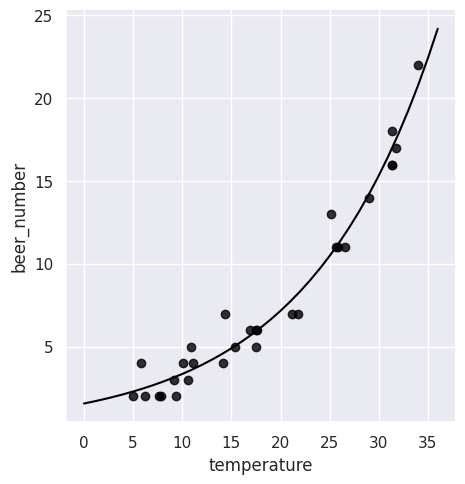

In [ ]:
# 예측값 작성
x_plot = np.arange(0, 37)
pred = mod_pois.predict(
    pd.DataFrame({"temperature": x_plot}))

# 회귀곡선을 그리지 않은 lmplot
sns.lmplot(y="beer_number", x = "temperature",
           data = beer, fit_reg = False,
          scatter_kws = {"color":"black"})
# 회귀곡선을 덧그리기
plt.plot(x_plot, pred, color="black")

### 회귀계수 해석
- 링크함수가 항등함수가 아닐 경우에는 획득한 회귀계수의 해석이 바뀐다.
- 로그함수를 사용한 경우의 계수 해석 방법
  - 일반적인 모델에서는 기온이 1도 오르면 맥주 매출이 X 원 증가한다고 해석하지만, <br> 로그함수를 사용하면 기온이 1도 오르면 맥주 판매 개수가 Y배가 된다는 해석이다.

In [ ]:
# 기온이 1도일 때의 판매 개수의 기댓값
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# 기온이 2도일 때의 판매 개수의 기댓값
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# 기온이 1도에서 1도 오르면 판매 개수는 몇 배가 되는지
pred_2 / pred_1

0    1.079045
dtype: float64

In [ ]:
# 이 결과는 회귀계수에 exp를 취한 값과 동일하다. (오즈비)
sp.exp(mod_pois.params["temperature"])

<ipython-input-42-9953c7609745>:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(mod_pois.params["temperature"])


1.079045054586893